# Intro Deep Learning



# Import Data

In [1]:
import pandas as pd
train = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30857 entries, 0 to 30856
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         30857 non-null  object 
 1   year          30857 non-null  int64  
 2   price         30857 non-null  int64  
 3   transmission  30857 non-null  object 
 4   mileage       30857 non-null  int64  
 5   fuelType      30857 non-null  object 
 6   tax           30857 non-null  int64  
 7   mpg           30857 non-null  float64
 8   engineSize    30857 non-null  float64
 9   brand         30857 non-null  object 
 10  ID            30857 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 2.6+ MB


# Build Standard Regression Model

In [4]:
# Import Functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Instantiate Model
model = LinearRegression()

# Create Train Data
train = pd.get_dummies(train, drop_first=True)
train = train.astype(int)
X = train.drop("price", axis=1)
y = train["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# fit model
model.fit(X_train, y_train)

#make prediction
y_pred = model.predict(X_test)

# Evaluate Model Performance
root_mean_squared_error(y_test, y_pred)

4264.149975042522

# Build Neural Network

## 1) Import Tensorflow / Keras

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #build a model of time sequential, one model after the other
from tensorflow.keras.layers import Dense # simple neuron network, where each neuron is connected with the other

## 2) Build & Compile Network

In [6]:
X.shape

(30857, 56)

In [7]:
model = Sequential()

model.add(Dense(56, input_shape=(56,), activation='relu')) # the input layer takes the shape of your input data
model.add(Dense(50, activation='relu'))                      # hidden layer with 50 neurons
model.add(Dense(50, activation='relu'))                      # hidden layer with 50 neurons
model.add(Dense(10, activation='relu'))                      # hidden layer with 10 neurons
model.add(Dense(1))                                          # the output layer consists of 1 neuron in regression

model.compile(optimizer="adam", loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3) Train Network

In [8]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 209038608.0000 - val_loss: 61749968.0000
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 64612788.0000 - val_loss: 58257460.0000
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 61961928.0000 - val_loss: 58444744.0000
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 58880688.0000 - val_loss: 57375204.0000
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55316892.0000 - val_loss: 58584452.0000
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 57318552.0000 - val_loss: 55262396.0000
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 55689148.0000 - val_loss: 54657276.0000
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56267280.0000 - val_loss: 53774788.0000
Epoch 9/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 53995020.0000 - val_loss: 55964176.0000
Epoch 10/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 57074964.0000 - val_loss: 52655500.000



*   epochs = number of times the entire data set is passed through the network
*   batch_size = number of instances that are passed trough the network at once



## 4) Visualize Training Process

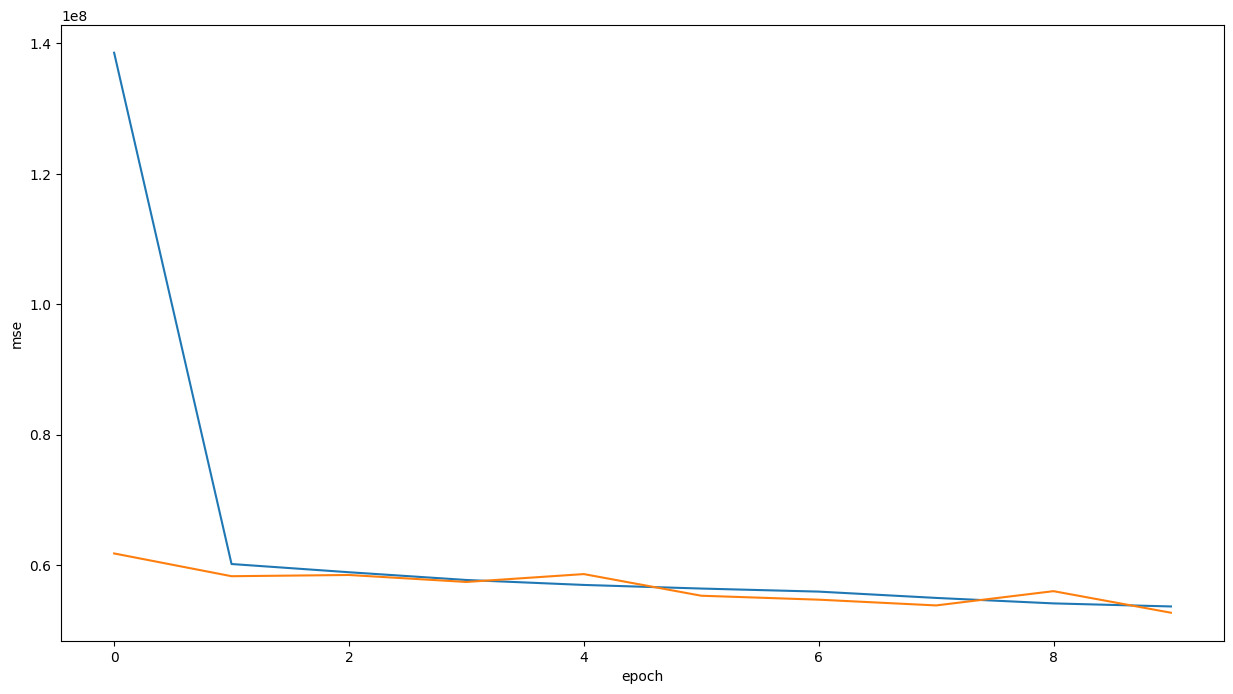

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.xlabel('epoch')
plt.ylabel('mse')

plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])

## 5) Calculate Error

In [10]:
y_pred = model.predict(X_test)
root_mean_squared_error(y_test, y_pred)

290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7256.41064453125